# Data Science Analyzation on Used Car Sales 

This jupitor notebook contains all work done on 1st dataset of imbalanced datasets. 

The github repository link is: 

https://github.com/anummanzoor901/Datascience888.git

To perform this assignment following steps are followed:

1.   Import dataset and insight 
2.   Making data imbalanced and visualization
3.   Preprocessing on the dataset
4.   Prediction,training, for this decision tree, xgboost and random forest are used.




# 1) Import dataset and insight

### 1.1) Importing Libraries

##### We will start with importing all important libraries and function required for this assignment. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median

import lightgbm as lgb
import xgboost as xgb


from sklearn.metrics import mean_squared_error
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.2) Analysing Dataset

##### First we import dataset and check the insight of it. How many columns, rows, null values etc this dataset contains. 

In [44]:
df=pd.read_csv('/content/usedCarData.csv')

In [45]:
df.head()

,make,model,badge,fuel_type,body_type,year,km_driven,price,state
0,Toyota,Kluger,LIMITED-4x4,Petrol,Wagon,2017,48788,35990,Western Australia
1,Toyota,Hilux,LS,Petrol,Other,2015,57764,38900,New South Wales
2,Fiat,NaN,NEO,Diesel,Sedan,2009,151668,16900,South Australia
3,Nissan,Navara,25i,Petrol,Ute,2010,133383,11999,New South Wales
4,Toyota,Hiace,SV6,Petrol,Van/Minivan,2008,281692,13999,New South Wales


In [4]:
df.shape

(25423, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25423 entries, 0 to 25422
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   make       25422 non-null  object
 1   model      21228 non-null  object
 2   badge      25423 non-null  object
 3   fuel_type  24707 non-null  object
 4   body_type  25404 non-null  object
 5   year       25423 non-null  int64 
 6   km_driven  25423 non-null  int64 
 7   price      25423 non-null  int64 
 8   state      25423 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.7+ MB


In [59]:
df.describe()

,year,km_driven,price
count,25423.000000,2.542300e+04,2.542300e+04
mean,2011.326515,1.517250e+06,2.923241e+04
std,6.183466,2.733096e+07,4.894423e+04
min,1900.000000,0.000000e+00,0.000000e+00
25%,2008.000000,4.500000e+04,8.990000e+03
50%,2012.000000,9.700000e+04,1.799000e+04
75%,2015.000000,1.560000e+05,3.399000e+04
max,2020.000000,8.845652e+08,1.800000e+06


### 1.3) Extract the requird data

##### I will extract data of "price, year, manufacturer, model, condition, transmission, type, paint_color, state, lat, long"
from this dataset. As only these columns are important to make a useful prediction. Other columns will be removed. 

In [6]:


#columns=[ "price", "year", "manufacturer", "model", "condition", "transmission", "type", "paint_color", "state", "lat", "long"]

In [7]:
#df = df[columns]






Checking if dataset contains null values

In [8]:
df.isnull().sum()

make            1
model        4195
badge           0
fuel_type     716
body_type      19
year            0
km_driven       0
price           0
state           0
dtype: int64

# 2) Imbalancing dataset 65%, 75%, 95%

To make my data imbalance I used random data creation method. It will create a random data to imbalanced the classes.

website which I used to study about random sampling: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html



### 2.1) imbalance (65%)

first I will generate 65% imbalanced data and visualize it. 

In [9]:
rows = df.sample(frac =.65)
rows

,make,model,badge,fuel_type,body_type,year,km_driven,price,state
12065,Holden,Cruze,CITY,Petrol,Sedan,2010,161194,3999,No Record
8917,Holden,Commodore,ACTIVE,Petrol,Hatchback,2018,111717,12500,No Record
13130,Nissan,Elgrand,SS,Petrol,Other,2011,71943,27990,No Record
1068,Nissan,NaN,KOMPRESSOR-AVANTGARDE,Diesel,Coupe (2 door),2011,121000,8500,No Record
682,Audi,A3,LX,Petrol,Hatchback,2008,109896,7690,No Record
...,...,...,...,...,...,...,...,...,...
10309,Holden,Captiva,OMEGA,Petrol,Wagon,2013,63559,10882,No Record
10678,Toyota,FJ,WORKMATE,Petrol,SUV,2012,165693,32888,No Record
16731,Honda,Jazz,+SPORT-2WD,Petrol,Hatchback,2018,7626,21888,No Record
10433,Hyundai,Tucson,1000KG-2M,Petrol,Wagon,2017,20546,23490,No Record


277472 rows are created randomly, and from the above display we can see that Nulls are randomly generated too. It created 65% random data. 

Next, I will combine and shuffle these randomly created rows with original dataset. 

In [10]:
df = pd.concat([df, rows])
df

,make,model,badge,fuel_type,body_type,year,km_driven,price,state
0,Toyota,Kluger,LIMITED-4x4,Petrol,Wagon,2017,48788,35990,Western Australia
1,Toyota,Hilux,LS,Petrol,Other,2015,57764,38900,New South Wales
2,Fiat,NaN,NEO,Diesel,Sedan,2009,151668,16900,South Australia
3,Nissan,Navara,25i,Petrol,Ute,2010,133383,11999,New South Wales
4,Toyota,Hiace,SV6,Petrol,Van/Minivan,2008,281692,13999,New South Wales
...,...,...,...,...,...,...,...,...,...
10309,Holden,Captiva,OMEGA,Petrol,Wagon,2013,63559,10882,No Record
10678,Toyota,FJ,WORKMATE,Petrol,SUV,2012,165693,32888,No Record
16731,Honda,Jazz,+SPORT-2WD,Petrol,Hatchback,2018,7626,21888,No Record
10433,Hyundai,Tucson,1000KG-2M,Petrol,Wagon,2017,20546,23490,No Record


#### Visualizing data

Vehicle purchase from 2000 to 2021

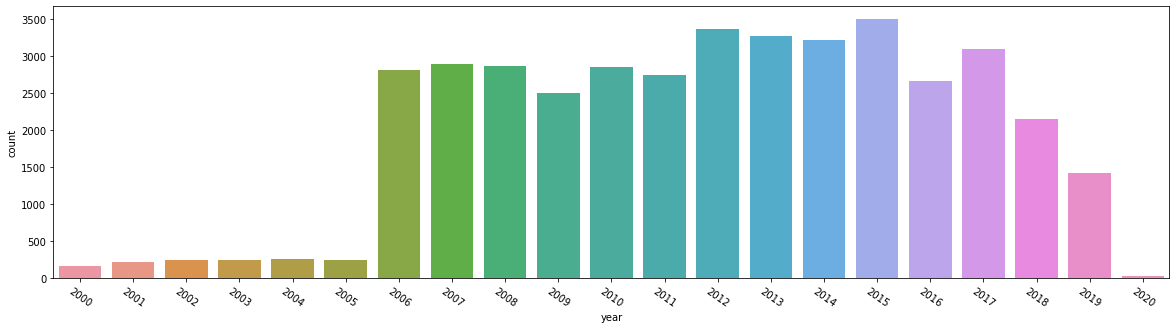

In [11]:
df_year = df[(df["year"]>1999) & (df["year"]<2022)].copy()
df_year["year"] = df_year["year"].astype(int)
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.countplot(data= df_year,x="year")
plt.show()

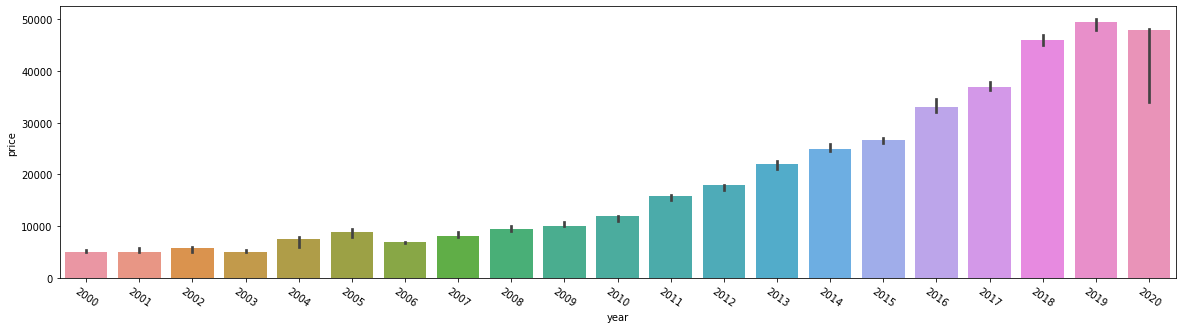

In [12]:
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.barplot(data= df_year,x="year", y= "price",estimator=median)
plt.show()

We can know vehicle's price is increasing from median graph. Except for 2021, since the dataset was created in 2021, not all records are present. 

#### Manufacturer company records

to see which manufacturer is smallest to largest

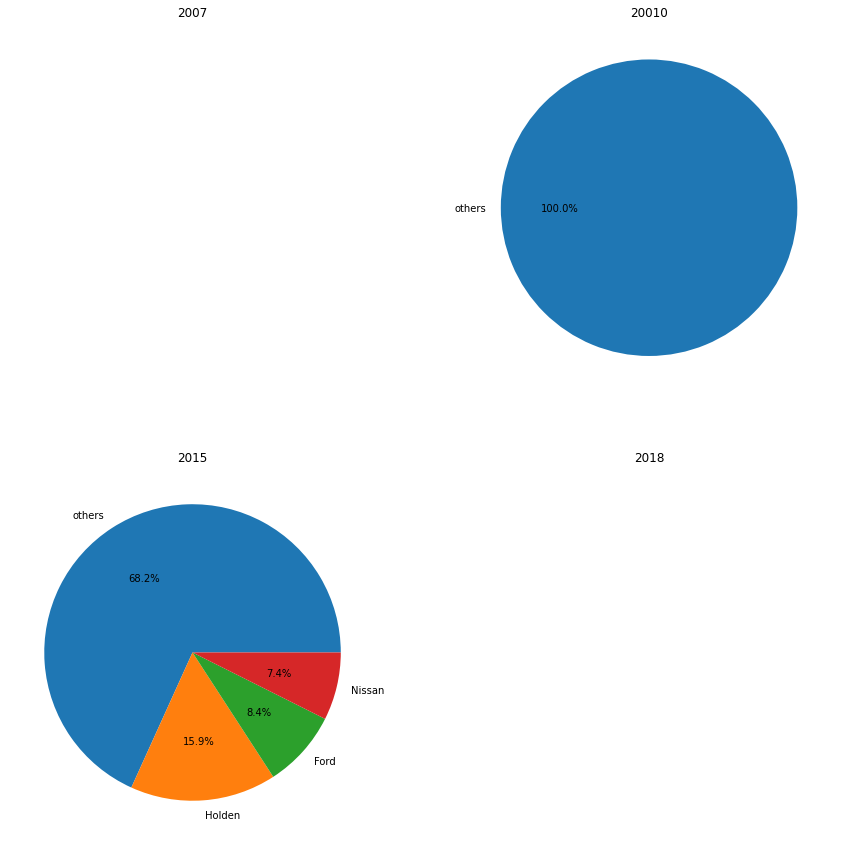

In [14]:
df_year["tmp"] = 1
data = pd.pivot_table(df_year, index = "make", columns="year",values="tmp",aggfunc=np.sum)
data = data.fillna(0)
data.loc['others'] = data[data<200].sum()
data[data<200] = 0

plt.figure(figsize=(15,15))
tmp_data1 = data[2000].sort_values(ascending=False)
plt.subplot(221)

tmp_data1[tmp_data1>0].plot.pie(autopct="%.1f%%",title="2007")
plt.axis("off")

tmp_data2 = data[2005].sort_values(ascending=False)
plt.subplot(222)

tmp_data2[tmp_data2>0].plot.pie(autopct="%.1f%%",title="20010")
plt.axis("off")

tmp_data3 = data[2010].sort_values(ascending=False)
plt.subplot(223)
tmp_data3[tmp_data3>0].plot.pie(autopct="%.1f%%",title="2015")
plt.axis("off")

tmp_data4 = data[2020].sort_values(ascending=False)
plt.subplot(224)

tmp_data4[tmp_data4>0].plot.pie(autopct="%.1f%%",title="2018")
plt.axis("off")


plt.show()

#### Top 10 models comparing

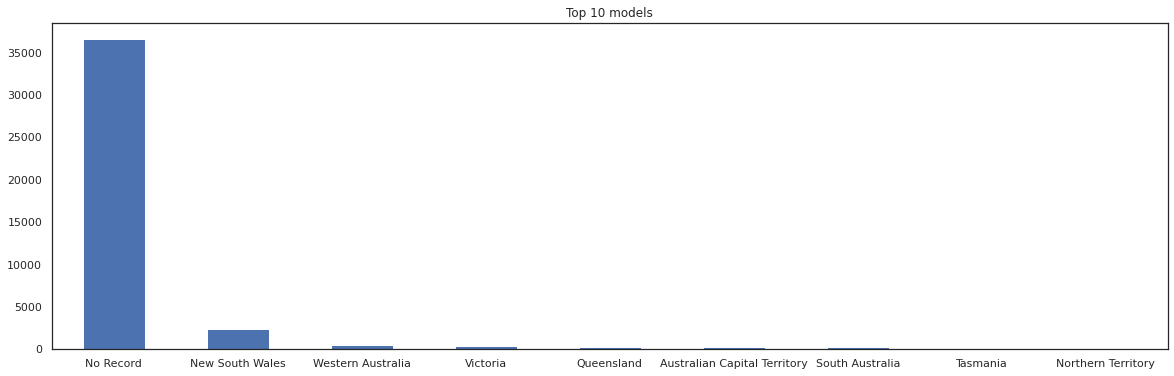

In [23]:
df_year['state'].value_counts().head(10).plot.bar(figsize=(20,6),rot=0, title="Top 10 models")
plt.show()

In [ ]:
#### Best and more bought color Queensland South Australia Tasmania, Northern Territory

In [ ]:
# plt.figure(figsize=(15,4))
# sns.countplot(data=df_year,x="paint_color")
# plt.show()

The most famous color is white, black and silver

#### Comparing color by condition

for many buyers condition along with color matters alot, lets graoh it. 

In [18]:
# plt.figure(figsize=(15,4))
# sns.countplot(data=df_year, x="paint_color", hue="condition")
# plt.show()

#### Plotng heat map

Heat map to analyse data and their corelation with each other.

In [21]:
# sns.set_theme(style="white")
# rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 11)),
#                  columns=list(df))
# corr = d.corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(11, 11))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 2.2) imbalancing (75%)

In [ ]:
df1=pd.read_csv('vehicles.csv')
columns=[ "price", "year", "manufacturer", "model", "condition", "transmission", "type", "paint_color", "state", "lat", "long"]
df1 = df1[columns]
rows1 = df1.sample(frac =.75)
rows1

,price,year,manufacturer,model,condition,transmission,type,paint_color,state,lat,long
170079,20988,2014.0,chevrolet,silverado 1500 4x4 z71,excellent,automatic,pickup,white,ks,NaN,NaN
287442,17488,2018.0,hyundai,santa fe sport,excellent,automatic,SUV,white,oh,41.246430,-81.358530
279396,15990,2017.0,toyota,yaris ia sedan 4d,good,other,sedan,red,ny,43.160000,-77.610000
33580,4900,2009.0,bmw,335i,good,automatic,other,custom,ca,33.851200,-118.145700
141372,39995,1996.0,porsche,911 carrera,NaN,automatic,convertible,silver,il,41.572305,-88.113993
...,...,...,...,...,...,...,...,...,...,...,...
339788,18695,2013.0,ram,1500,NaN,automatic,pickup,NaN,pa,40.894535,-74.152367
412741,12999,2016.0,chevrolet,malibu lt,NaN,automatic,sedan,silver,wa,46.214960,-119.122349
251740,5999,2011.0,volkswagen,golf,NaN,automatic,other,blue,nj,40.319200,-74.428500
217995,27990,2019.0,infiniti,qx50 luxe sport utility,good,automatic,hatchback,NaN,mn,45.550000,-94.220000


In [ ]:
df1 = pd.concat([df1, rows1])
df1

,price,year,manufacturer,model,condition,transmission,type,paint_color,state,lat,long
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
339788,18695,2013.0,ram,1500,NaN,automatic,pickup,NaN,pa,40.894535,-74.152367
412741,12999,2016.0,chevrolet,malibu lt,NaN,automatic,sedan,silver,wa,46.214960,-119.122349
251740,5999,2011.0,volkswagen,golf,NaN,automatic,other,blue,nj,40.319200,-74.428500
217995,27990,2019.0,infiniti,qx50 luxe sport utility,good,automatic,hatchback,NaN,mn,45.550000,-94.220000


In [ ]:
df1 = df1.dropna()
df1.shape

(305380, 11)

#### Visualizing data after imbalancing

Vehicle purchase from 2000 to 2021

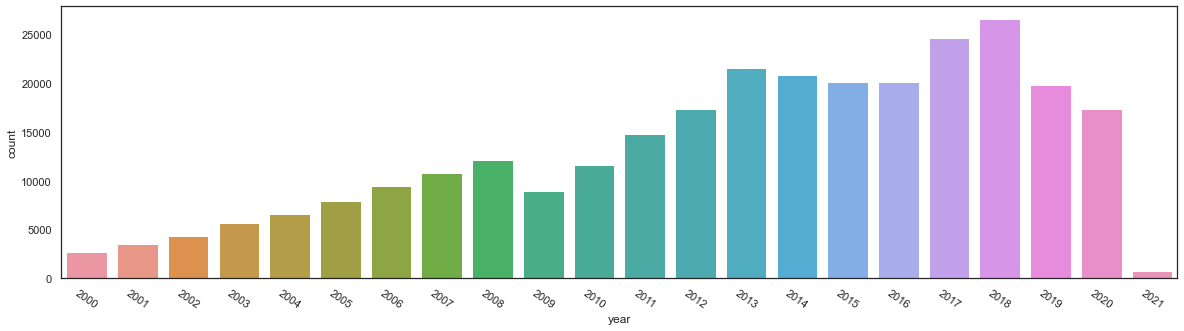

In [ ]:
df_year = df1[(df1["year"]>1999) & (df1["year"]<2022)].copy()
df_year["year"] = df_year["year"].astype(int)
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.countplot(data= df_year,x="year")
plt.show()

#### Comparing color by condition adrer 75% imbalancing

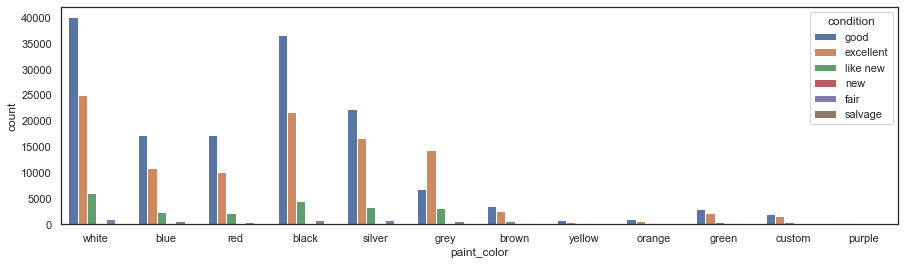

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_year, x="paint_color", hue="condition")
plt.show()

### 2.3) Imbalancing (95%)

In [ ]:
rows2  = df1.sample(frac =.95)
rows2

,price,year,manufacturer,model,condition,transmission,type,paint_color,state,lat,long
144736,33990,2018.0,gmc,sierra 1500 double cab sle,good,other,pickup,white,il,42.270000,-89.060000
408101,4999,2011.0,kia,sorento,excellent,automatic,SUV,black,wa,47.103695,-122.435819
155778,7500,2008.0,chrysler,sebring touring,like new,automatic,convertible,white,ia,41.963666,-91.720216
300904,15975,2010.0,chevrolet,silverado 1500,excellent,automatic,pickup,red,oh,40.071628,-80.859182
284916,7895,2012.0,jeep,compass latitude 4x4,excellent,automatic,SUV,red,nh,42.980400,-71.457402
...,...,...,...,...,...,...,...,...,...,...,...
6835,45995,2021.0,acura,tlx a-spec awd,excellent,automatic,sedan,grey,ak,61.217811,-149.870231
76751,29990,2019.0,kia,niro ev ex wagon 4d,good,other,wagon,black,co,39.760000,-104.870000
171171,15990,2017.0,ford,c-max hybrid se wagon 4d,good,other,wagon,blue,ky,38.040000,-84.450000
256529,4995,2010.0,honda,odyssey,good,automatic,van,black,nj,39.937155,-75.088194


In [ ]:
df2 = pd.concat([df1, rows2])
df2

,price,year,manufacturer,model,condition,transmission,type,paint_color,state,lat,long
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,other,pickup,white,al,32.590000,-85.480000
28,22590,2010.0,chevrolet,silverado 1500,good,other,pickup,blue,al,32.590000,-85.480000
29,39590,2020.0,chevrolet,silverado 1500 crew,good,other,pickup,red,al,32.590000,-85.480000
30,30990,2017.0,toyota,tundra double cab sr,good,other,pickup,red,al,32.590000,-85.480000
31,15000,2013.0,ford,f-150 xlt,excellent,automatic,truck,black,al,32.592000,-85.518900
...,...,...,...,...,...,...,...,...,...,...,...
6835,45995,2021.0,acura,tlx a-spec awd,excellent,automatic,sedan,grey,ak,61.217811,-149.870231
76751,29990,2019.0,kia,niro ev ex wagon 4d,good,other,wagon,black,co,39.760000,-104.870000
171171,15990,2017.0,ford,c-max hybrid se wagon 4d,good,other,wagon,blue,ky,38.040000,-84.450000
256529,4995,2010.0,honda,odyssey,good,automatic,van,black,nj,39.937155,-75.088194


In [ ]:
df2.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
transmission    0
type            0
paint_color     0
state           0
lat             0
long            0
dtype: int64

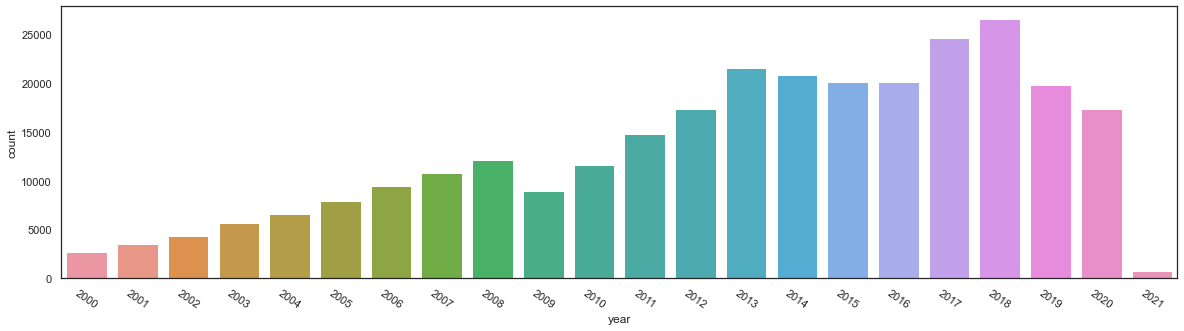

In [ ]:
df_year = df1[(df1["year"]>1999) & (df1["year"]<2022)].copy()
df_year["year"] = df_year["year"].astype(int)
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.countplot(data= df_year,x="year")
plt.show()

# 3) Preprocessing on the dataset

##### Introdcuing a new column price category which will destribute prices in to 3 categories, low, medium and high, based on prices. 

In [46]:
df['price'] = np.where(df.price <= 1000, 1, 
                                  np.where(df.price >= 80000, 3, 2))

df['fuel_type'] = np.where(df.fuel_type == 'Petrol', 1,
                      np.where(df.fuel_type == 'Diesel', 2, 3))


# df['state'] = np.where(df.state == 'Western Australia', 1,
#                       np.where(df.state == 'New South Wales', 2,
#                                df.state == 'Queensland', 3,
#                                df.state == 'South Australia', 4,
#                                df.state == 'Tasmania', 5, 6))

# df['model'] = np.where(df.state == 'Barina', 1,
#                       np.where(df.state == 'Ute', 2,
#                                df.state == 'Falcon', 3,
#                                df.state ==  'Elgrand', 4,
#                                df.state == 'Fj', 5,
#                                df.state ==  'Commodre', 6,
#                                df.state == 'Navara', 7,
#                                df.state == 'Ranger', 8, 9))
df.drop('make', axis=1, inplace=True)
df.drop('badge', axis=1, inplace=True)
df.drop('body_type', axis=1, inplace=True)
df.drop('model', axis=1, inplace=True)
df.drop('state', axis=1, inplace=True)
df                      

,fuel_type,year,km_driven,price
0,1,2017,48788,2
1,1,2015,57764,2
2,2,2009,151668,2
3,1,2010,133383,2
4,1,2008,281692,2
...,...,...,...,...
25418,1,2016,49338,2
25419,1,2016,29616,2
25420,2,2018,10990,2
25421,1,2013,50998,2


In [ ]:
df.to_csv (r'/content/2nd Dataset Car Dekho.csv', index = False, header=True)

In [30]:
print(df)


           model  fuel_type  year  km_driven  price              state
0         Kluger          3  2017      48788      1  Western Australia
1          Hilux          3  2015      57764      1    New South Wales
2            NaN          3  2009     151668      1    South Australia
3         Navara          3  2010     133383      1    New South Wales
4          Hiace          3  2008     281692      1    New South Wales
...          ...        ...   ...        ...    ...                ...
10309    Captiva          3  2013      63559      1          No Record
10678         FJ          3  2012     165693      1          No Record
16731       Jazz          3  2018       7626      1          No Record
10433     Tucson          3  2017      20546      1          No Record
366    clubsport          3  2006     182281      1          No Record

[41948 rows x 6 columns]


# 4) Prediction,training: for this decision tree, xgboost and random forest are used.

###4.1 Lightgbm

I selected Lightgbm initially for this project as it provide effective and efficient implementation. But I face some errors, I tried to solve them whole day but couldn't reaeched the solution. 

In [47]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [49]:
# y_train = training_data['Price Category']
# X_train = training_data.drop(['Price Category'], axis=1)
X_test

,fuel_type,year,km_driven
914,1,2009,112812
21373,2,2018,20
1598,1,2012,122456
22750,2,2015,76200
13069,1,2012,114344
...,...,...,...
23704,1,2012,160000
12019,1,2015,124388
3075,1,2017,19230
7981,1,2007,78641


In [ ]:
# y_test = testing_data['Price Category']
# X_test = testing_data.drop(['Price Category'], axis=1)

In [50]:
import lightgbm

train_data = lightgbm.Dataset(X_train, y_train)
test_data = lightgbm.Dataset(X_test, label=y_test)

In [51]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=500,
                       early_stopping_rounds=10)

[1]	valid_0's auc: 1
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 1
[3]	valid_0's auc: 1
[4]	valid_0's auc: 1
[5]	valid_0's auc: 1
[6]	valid_0's auc: 1
[7]	valid_0's auc: 1
[8]	valid_0's auc: 1
[9]	valid_0's auc: 1
[10]	valid_0's auc: 1
[11]	valid_0's auc: 1
Early stopping, best iteration is:
[1]	valid_0's auc: 1


In [ ]:
def run_lgb(X_train, y_train, X_test, y_test, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 40,
        "learning_rate" : 0.004,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "seed": 42
    }
    lgtrain = lgb.Dataset(X_train, label=y_train)
    lgval = lgb.Dataset(X_test, label=y_test)
    evals_result = {}
    model = lgb.train(params, lgtrain, 5000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=150, 
                      evals_result=evals_result)
    
    pred_test_y = np.expm1(model.predict(test_X, num_iteration=model.best_iteration))
    return pred_test_y, model, evals_result

###4.2 Random forest

In [52]:
pip install --upgrade category_encoders

In [55]:
encoder = ce.OrdinalEncoder(cols=['year',	'km_driven',	'fuel_type'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [56]:
X_train.head()

,fuel_type,year,km_driven
7006,1,1,1
14901,1,2,2
16550,2,3,3
23848,1,4,4
24105,1,5,5


##### We now have training and test set ready for model building.

##### With estimator = 10

In [57]:

# instantiate the classifier 

rf = RandomForestClassifier(random_state=0)
# fit the model

rf.fit(X_train, y_train)
# Predict the Test dataset results

y_pred = rf.predict(X_test)
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 10 decision-trees : 0.9331


##### Estimator = 100

In [58]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

rfc_100.fit(X_train, y_train)
# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9331


In [60]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [61]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

km_driven    0.883717
year         0.111513
fuel_type    0.004770
dtype: float64

##### We can see that the most important feature is selling_price and least important feature is seller_type

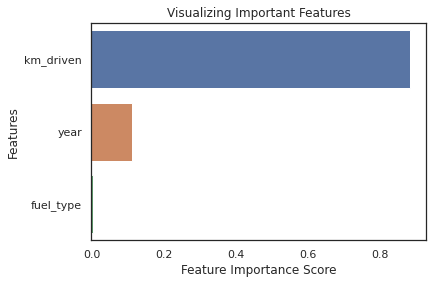

In [62]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')
# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.19      0.14      0.16        81
           2       0.95      0.98      0.97      4732
           3       0.63      0.35      0.45       272

    accuracy                           0.93      5085
   macro avg       0.59      0.49      0.52      5085
weighted avg       0.92      0.93      0.92      5085



### 4.3 Decision Tree

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
       
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
     
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
       
        print(f"CLASSIFICATION REPORT:\n{clf_report}")

        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [65]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 99.04%
CLASSIFICATION REPORT:
                    1             2            3  accuracy     macro avg  \
precision    0.848665      0.993244     0.983902  0.990363      0.941937   
recall       0.880000      0.996663     0.917034  0.990363      0.931233   
f1-score     0.864048      0.994950     0.949292  0.990363      0.936097   
support    325.000000  18880.000000  1133.000000  0.990363  20338.000000   

           weighted avg  
precision      0.990413  
recall         0.990363  
f1-score       0.990315  
support    20338.000000  
Confusion Matrix: 
 [[  286    38     1]
 [   47 18817    16]
 [    4    90  1039]]

Test Result:

Accuracy Score: 89.75%
CLASSIFICATION REPORT:
                   1            2           3  accuracy    macro avg  \
precision   0.175000     0.953004    0.315942  0.897542     0.481315   
recall      0.172840     0.938504    0.400735  0.897542     0.504026   
f1-score    0.173913     0.945698    0.353323  0.897542     0.49097

#### decision tree with the hyperparamters

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:

Accuracy Score: 92.86%
CLASSIFICATION REPORT:
               1             2            3  accuracy     macro avg  \
precision    0.0      0.928965     0.583333  0.928557      0.504100   
recall       0.0      0.999523     0.012357  0.928557      0.337293   
f1-score     0.0      0.962954     0.024201  0.928557      0.329051   
support    325.0  18880.000000  1133.000000  0.928557  20338.000000   

           weighted avg  
precision      0.894866  
recall         0.928557  
f1-score       0.895269  
support    20338.000000  
Confusion Matrix: 
 [[    0   324     1]
 [    0 18871     9]
 [    0  1119    14]]

Test Result:

Accuracy Score: 93.08%
CLASSIFICATION REPORT:
              1            2           3  accuracy    macro avg  weighted avg
precision   0.0     0.931272    0.57142

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

### 4.4 XGBoost

In [67]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25423 entries, 0 to 25422
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   fuel_type  25423 non-null  int64
 1   year       25423 non-null  int64
 2   km_driven  25423 non-null  int64
 3   price      25423 non-null  int64
dtypes: int64(4)
memory usage: 794.6 KB


##### Seperating for testing and training

##### Now we will divide our dataset into 2 parts, 80% into training and 20% in testing data.


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

##### XGB hyperparameters

In [69]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [70]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[09:40:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [71]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.590473


In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# accuracy_score(y_test, y_pred, normalize=False)


0.9331366764995084